In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### import packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew
import pylab
%matplotlib inline

### read data

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df = test['Id']

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

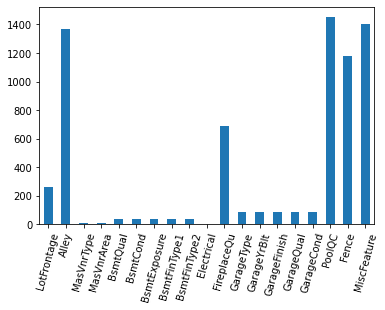

In [8]:
# count the number of missing values in each column
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.plot.bar(rot=75)

In [9]:
# get a list of quantative columns(numeric) 
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
# get a list of qulitative features
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

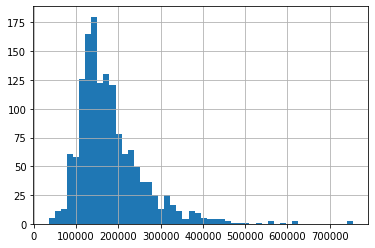

In [10]:
#get the output and visualize it
y = train['SalePrice']
y.hist(bins=50)
plt.show()

### visualize quantitative features

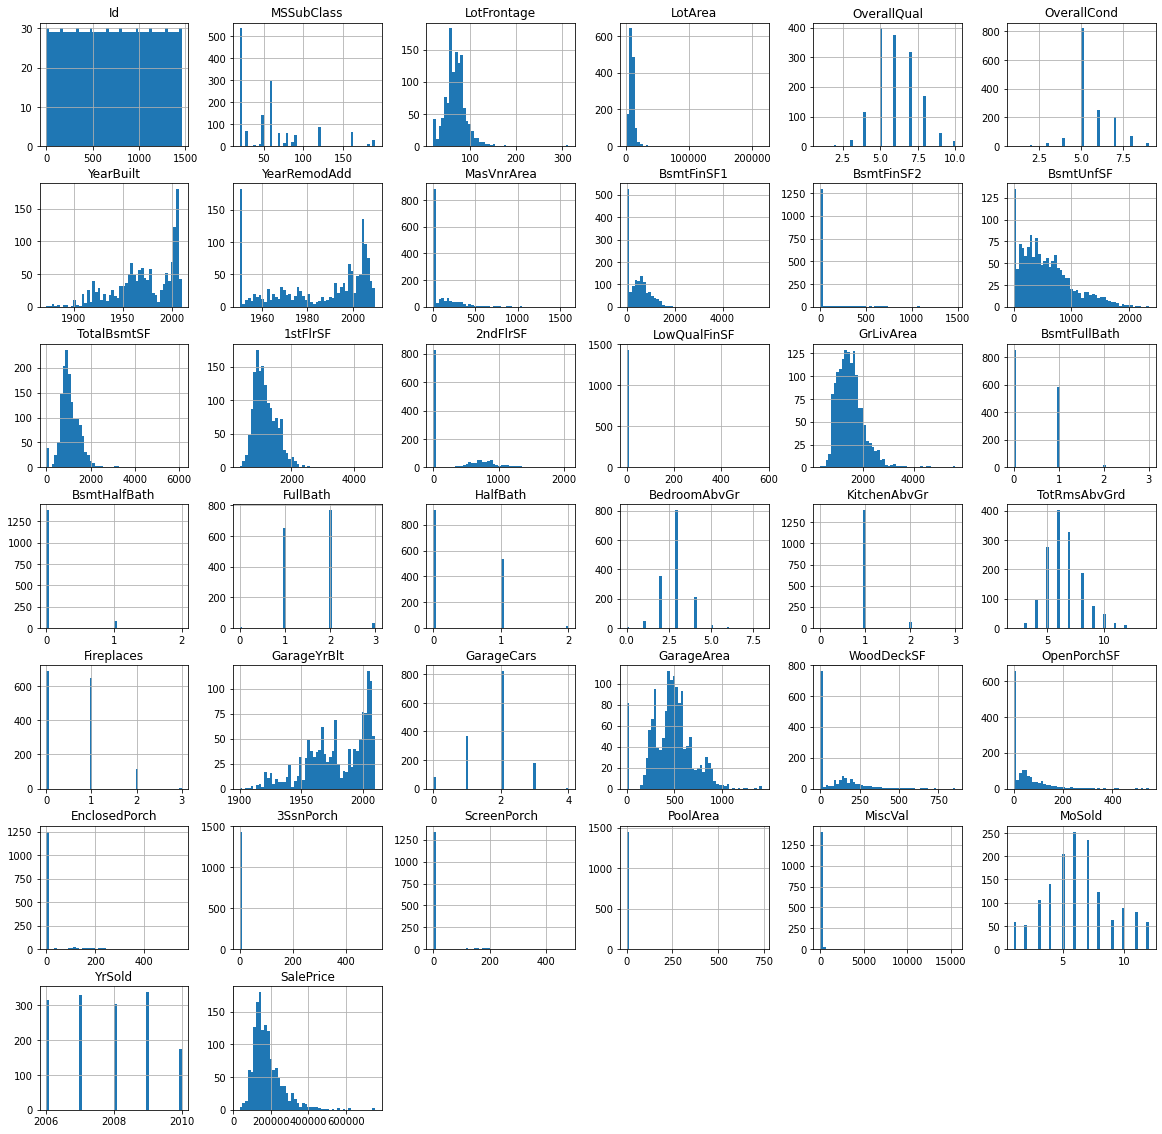

In [11]:
quantitative_data = train[quantitative]
quantitative_data.hist(bins=50, figsize=(20,20))
plt.show()

### plot the correlation of features with the target

In [12]:
quantitative_data = train[quantitative]
corr_matrix = quantitative_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

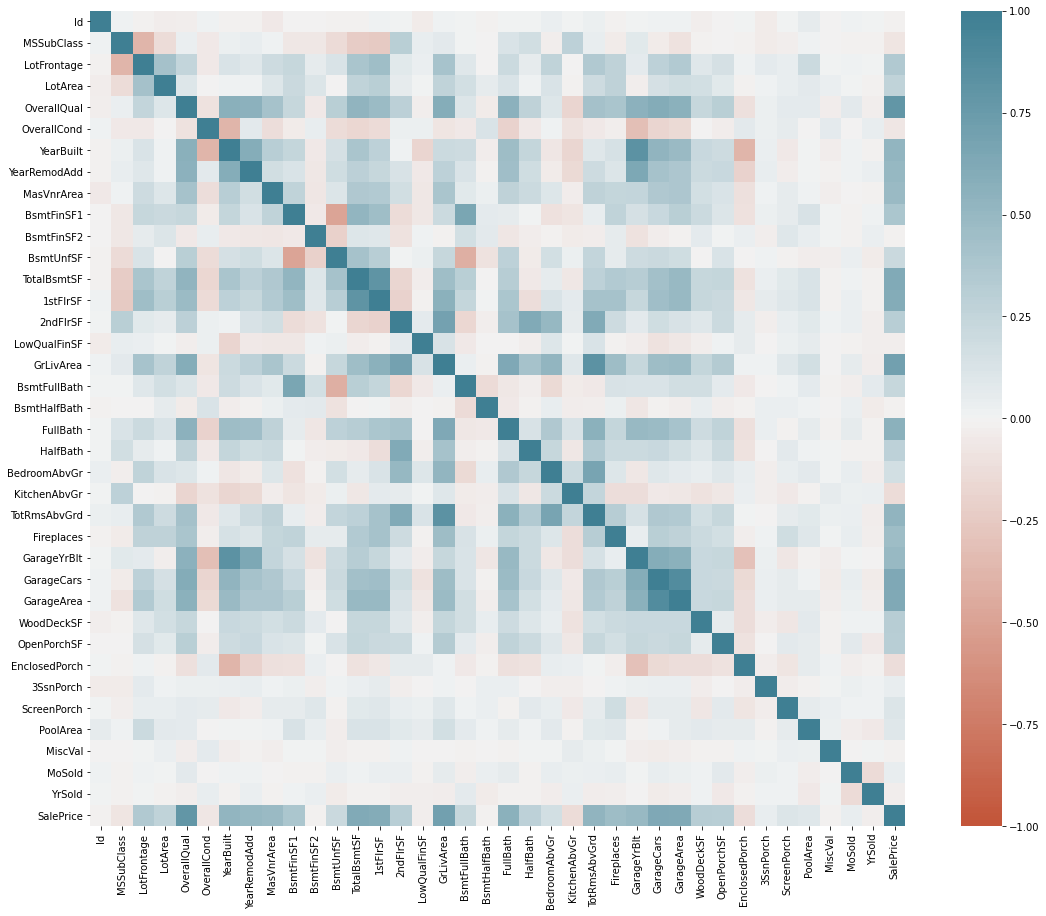

In [13]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(quantitative_data.corr(),
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20, 220, n=200),
                square=True)

### make a boxplot to show how the output changes with qualitative features

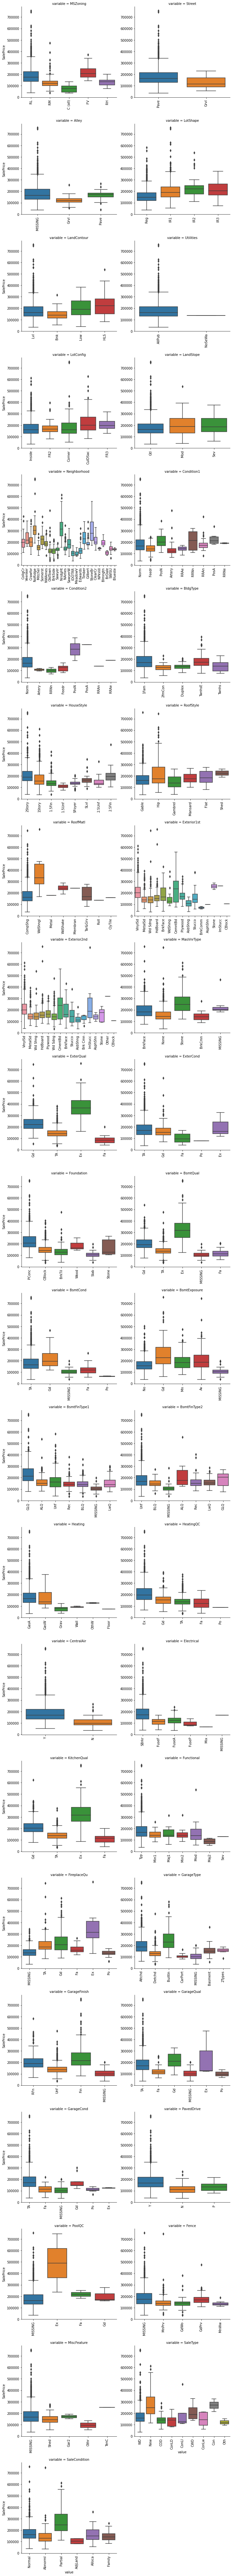

In [14]:
train_to_plot = train.copy()
for c in qualitative:
    train_to_plot[c] = train_to_plot[c].astype('category')
    if train_to_plot[c].isnull().any():
        train_to_plot[c] = train_to_plot[c].cat.add_categories(['MISSING'])
        train_to_plot[c] = train_to_plot[c].fillna('MISSING')
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
#create a box plot to show how the output changes with qualitative features
f = pd.melt(train_to_plot, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

### handling missing values

In [15]:
train[quantitative].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
# fill missing values in train quantitative features
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"]\
                            .transform(lambda x: x.fillna(x.median()))
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)


# fill missing values in test quantitative features

test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"]\
                          .transform(lambda x: x.fillna(x.median()))
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [17]:
train[quantitative].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [18]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### handle missing values in categorical data

In [19]:
train[qualitative].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [20]:
train[qualitative] = train[qualitative].fillna(0)
test[qualitative] = test[qualitative].fillna(0)

In [21]:
train[qualitative].isnull().sum()
test[qualitative].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### feature selection

In [22]:
# drop features with many missing values 
train = train.drop(columns=["Id", "Alley", "Fence", "CentralAir", "FireplaceQu", "PoolArea", "LowQualFinSF", "3SsnPorch", "MiscVal", 'RoofMatl','Street','Condition2','Utilities','Heating'])

test = test.drop(columns=["Id", "Alley", "Fence", "CentralAir", "FireplaceQu", "PoolArea", "LowQualFinSF", "3SsnPorch", "MiscVal", 'RoofMatl','Street','Condition2','Utilities','Heating'])

In [23]:
train.drop(['GarageYrBlt','TotRmsAbvGrd','GarageArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

test.drop(['GarageYrBlt','TotRmsAbvGrd','GarageArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [24]:
print(train.shape)
print(test.shape)

(1460, 61)
(1459, 60)


### feature encoding

In [25]:
ordinal_ranking = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'Reg':3, 'IR1':2, 'IR2':1,'IR3':0,'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 
            'ELO':1, 'Gtl':3, 'Mod':2, 'Sev':1, 'Av':3, 'Mn':2, 'No':1, 'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':-1, 'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5,
            'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'Fin':2, 'RFn':1}

In [26]:
train = train.replace(ordinal_ranking)
test = test.replace(ordinal_ranking)

In [27]:
nominal_features = ['LandContour', 'LotConfig','Neighborhood','Condition1', 'BldgType','RoofStyle',
                    'MasVnrType','Foundation','GarageType','PavedDrive',
                   'SaleCondition']

In [28]:
# one_hot_encoding
train = pd.get_dummies(data = train , columns = nominal_features, drop_first=True)

test = pd.get_dummies(data = test , columns = nominal_features, drop_first=True)

In [29]:
print(train.shape)
print(test.shape)


(1460, 120)
(1459, 119)


In [30]:
col_to_drop = ['MiscFeature' , 'Electrical' , 'SaleType' , 'Exterior2nd' , 'Exterior1st' , 'HouseStyle' , 'MSZoning' , 'MSSubClass']

In [31]:
train = train.drop(columns = col_to_drop)

test = test.drop(columns = col_to_drop)

In [32]:
print(train.shape)
print(test.shape)

(1460, 112)
(1459, 111)


In [33]:
# from sklearn.preprocessing import OrdinalEncoder
# col_to_encode = ['MiscFeature' , 'Electrical' , 'SaleType' , 'HouseStyle' , 'MSZoning']
# cols = ['Exterior2nd', 'Exterior1st', ]
# train.drop(columns = cols)
# test.drop(columns=cols)
# ordinal_encoder = OrdinalEncoder()
# # Assigning numerical values and storing in another column
# train[col_to_encode] = ordinal_encoder.fit_transform(train[col_to_encode])
# test[col_to_encode] = ordinal_encoder.transform(test[col_to_encode])
# for col in col_to_encode:
#     print(train[col].unique())

### model

In [34]:
y = train['SalePrice']
x = train.drop(columns = ['SalePrice'])

In [35]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state=0)

### train the model

In [36]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_1=RandomForestRegressor(n_estimators=500, random_state=0)
xg_model = XGBRegressor(n_estimators=700, learning_rate=0.01)

xg_model.fit(x_train, y_train)
model_1.fit(x_train, y_train)


RandomForestRegressor(n_estimators=500, random_state=0)

### make predictions

In [37]:
predicted=xg_model.predict(x_val)

predicted1 = model_1.predict(x_val)

### calculate error and accuracy

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


print('mean_squared_error using XGBRegressor : {}'.format(np.sqrt(mean_squared_error(y_val,predicted))))

print('mean_squared_error using RandomForestRegressor : {}'.format(np.sqrt(mean_squared_error(y_val,predicted1))))
print('*' * 100)
print('mean_absolute_error using XGBRegressor : {}'.format(mean_absolute_error(y_val,predicted)))

print('mean_absolute_error using RandomForestRegressor : {}'.format(mean_absolute_error(y_val,predicted1)))
print('*' * 100)
print('Accuracy using XGBRegressor : {}'.format(r2_score(y_val,predicted)))

print('Accuracy using RandomForestRegressor : {}'.format(r2_score(y_val,predicted1)))

mean_squared_error using XGBRegressor : 35202.97316459612
mean_squared_error using RandomForestRegressor : 32542.628210177892
****************************************************************************************************
mean_absolute_error using XGBRegressor : 17602.762494648974
mean_absolute_error using RandomForestRegressor : 17251.960273972603
****************************************************************************************************
Accuracy using XGBRegressor : 0.8205507901146409
Accuracy using RandomForestRegressor : 0.8466484710287692


In [39]:
test = test.fillna(0)
np.where(np.isnan(test))
# x_val.info()
y_test_pred = model_1.predict(test)

In [40]:
test['SalePrice']= y_test_pred
test['Id']= test_df
test[['Id','SalePrice']].to_csv('/kaggle/working/submission.csv', index=False)